In [1]:
from utils import *
import re
from pprint import pprint
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

numRemover = NumRemover()
# wordRemover = WordRemover(stopwords.words('portuguese'))

all_data = get_data_from_db()
all_data = numRemover.fit_transform(all_data)
# all_data = wordRemover.fit_transform(all_data)

pos_dataframe = numRemover.fit_transform(get_data_from_db(sentiment="PO"))
neu_dataframe = numRemover.fit_transform(get_data_from_db(sentiment="NE"))
neg_dataframe = numRemover.fit_transform(get_data_from_db(sentiment="NG"))

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words=stopwords.words('portuguese'))
vectorizer.fit(all_data["texts"])
pos_matrix = vectorizer.transform(pos_dataframe["texts"])
neu_matrix = vectorizer.transform(neu_dataframe["texts"])
neg_matrix = vectorizer.transform(neg_dataframe["texts"])


len(vectorizer.vocabulary_)

5927

In [2]:
from numpy.linalg import norm
import numpy as np

pos_vector = np.sum(pos_matrix, axis=0)
neg_vector = np.sum(neg_matrix, axis=0)
neu_vector = np.sum(neu_matrix, axis=0)

print(pos_vector.dot(neg_vector.transpose())/(norm(pos_vector)*norm(neg_vector)))
print(neu_vector.dot(neg_vector.transpose())/(norm(neu_vector)*norm(neg_vector)))
print(pos_vector.dot(neu_vector.transpose())/(norm(neu_vector)*norm(pos_vector)))

cv = CountVectorizer(stop_words= stopwords.words('portuguese'))
voc_pos = set(cv.fit(pos_dataframe["texts"]).vocabulary_.keys())
voc_neg = set(cv.fit(neg_dataframe["texts"]).vocabulary_.keys())
voc_neu = set(cv.fit(neu_dataframe["texts"]).vocabulary_.keys())

def intersection_percentage(voc1, voc2):
    p = (len(voc1.intersection(voc2))/len(voc1.union(voc2)))*100
    print("Proporção: ", p, "%")
    

print("\nPO e NG:")
intersection_percentage(voc_pos, voc_neg)
print("PO e NE:")
intersection_percentage(voc_pos, voc_neu)
print("NE e NG:")
intersection_percentage(voc_neu, voc_neg)

[[ 0.83189175]]
[[ 0.8956339]]
[[ 0.81038748]]

PO e NG:
Proporção:  30.014081673707505 %
PO e NE:
Proporção:  30.056753688989783 %
NE e NG:
Proporção:  31.176470588235293 %


### Observando a variancia das palavras da classe PO

<IPython.core.display.Javascript object>


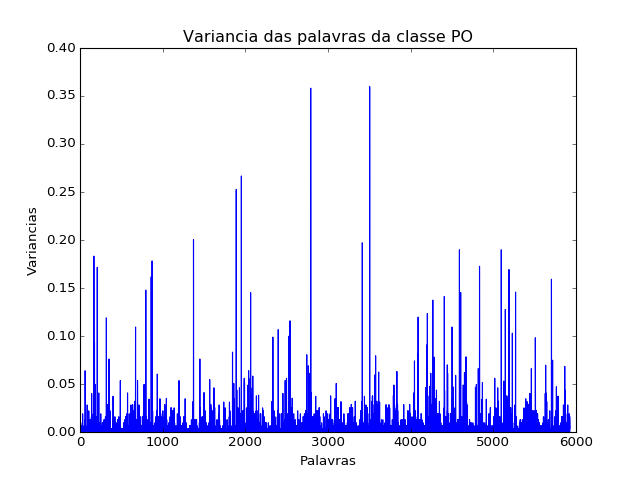

In [3]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
pos_var = np.var(pos_matrix.toarray(), axis=0)


fig = plt.figure(1)

ax = plt.axes()
ax.plot(pos_var)

plt.xlabel("Palavras")
plt.ylabel("Variancias")
plt.title("Variancia das palavras da classe PO")

### Observando a variancia das palavras da classe NG

<IPython.core.display.Javascript object>


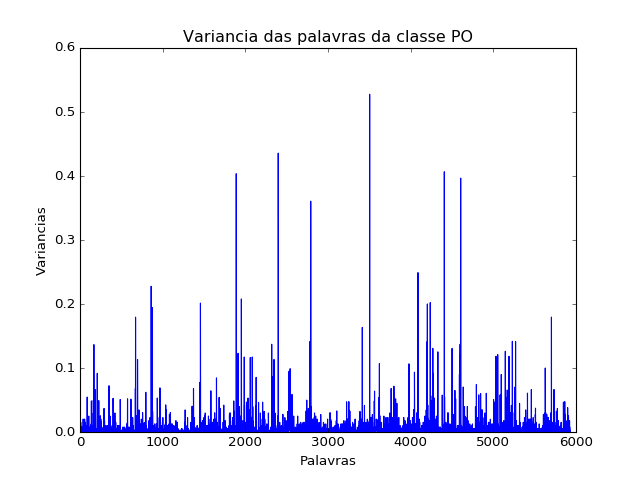

In [86]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
neg_var = np.var(neg_matrix.toarray(), axis=0)


fig = plt.figure(2)

ax = plt.axes()
ax.plot(neg_var)

plt.xlabel("Palavras")
plt.ylabel("Variancias")
plt.title("Variancia das palavras da classe PO")

### Observando a variancia das palavras da classe NE

<IPython.core.display.Javascript object>


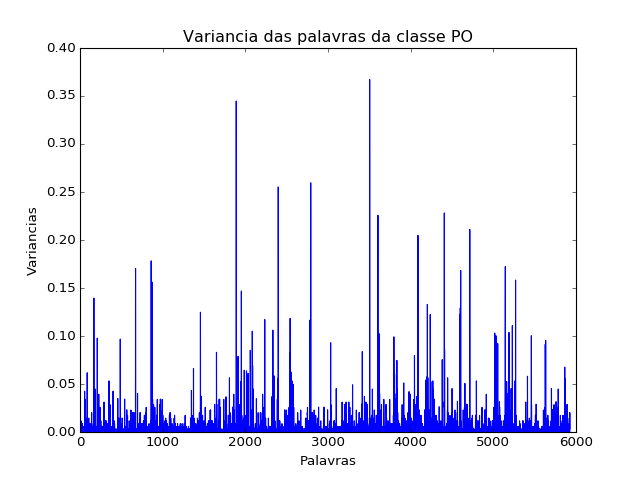

In [100]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
neu_var = np.var(neu_matrix.toarray(), axis=0)


fig = plt.figure(1)

ax = plt.axes()
ax.plot(neu_var)

plt.xlabel("Palavras")
plt.ylabel("Variancias")
plt.title("Variancia das palavras da classe PO")

### Obter os indices das palavras com variancia maior que 0.1


In [88]:
def get_words(var_vector, var_threshold = 0.1):
    word_indexes = [index for index in range(0, len(var_vector)) if var_vector[index] > var_threshold]
    vocabulary = {v:k for k,v in vectorizer.vocabulary_.items()}

    word_list = [vocabulary[index] for index in word_indexes]
    return word_list

lex = list(set(get_words(neg_var, var_threshold = 0.02) + get_words(pos_var, var_threshold=0.02)))


### Palavras que aparecem nas duas classes

<IPython.core.display.Javascript object>


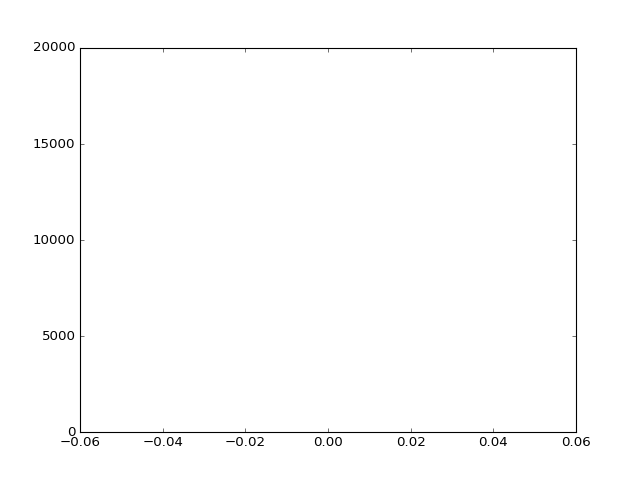

 ...]

In [101]:
sp = np.array(np.sum(pos_matrix, axis=0))
sn = np.array(np.sum(neg_matrix, axis=0))

prod = sp*sn
prod.shape

indexes = 